<a href="https://colab.research.google.com/github/Isometric1/Codeforces-problems-by-math_for_life/blob/main/Spaceship%20Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import math
! pip install catboost
from catboost import CatBoostRegressor
from sklearn import preprocessing
! pip install phik
import phik
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import math
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
! pip install featexp
from featexp import get_trend_stats
import featexp
from featexp import get_univariate_plots
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
! gdown --id 1FjPsw8_ltyHoPJwi2eFc_b4GGwyUcdyX

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1FjPsw8_ltyHoPJwi2eFc_b4GGwyUcdyX
To: /content/spaceship-titanic.zip
100% 306k/306k [00:00<00:00, 105MB/s]


In [2]:
! unzip /content/spaceship-titanic.zip -d /content/spaceship-titanic

Archive:  /content/spaceship-titanic.zip
  inflating: /content/spaceship-titanic/sample_submission.csv  
  inflating: /content/spaceship-titanic/test.csv  
  inflating: /content/spaceship-titanic/train.csv  


In [204]:
df1 = pd.read_csv('/content/spaceship-titanic/train.csv')
main_test = pd.read_csv('/content/spaceship-titanic/test.csv')
df = pd.read_csv('/content/spaceship-titanic/train.csv')
train,test = train_test_split(df,train_size = 0.8)

In [205]:
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [206]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [207]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Text(0.5, 1.0, 'Number of missing values in the given features')

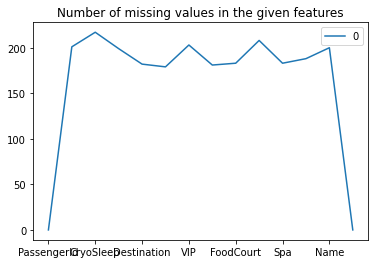

In [209]:
pd.DataFrame(df.isnull().sum()).plot.line().set_title("Number of missing values in the given features")

Text(0.5, 1.0, 'Missing values heatmap')

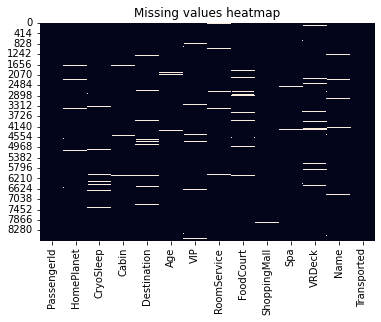

In [210]:
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

In [211]:
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

Анализ столбцов

In [212]:
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [213]:
len(df[(df['Transported'] == True) & (df['HomePlanet'] == 'Europa')])


1404

In [214]:
len(df[(df['Transported'] == False) & (df['HomePlanet'] == 'Europa')])

727

In [215]:
len(df[(df['Transported'] == True) & (df['HomePlanet'] == 'Earth')])

1951

In [216]:
len(df[(df['Transported'] == False) & (df['HomePlanet'] == 'Earth')])

2651

In [217]:
len(df[(df['Transported'] == True) & (df['HomePlanet'] == 'Mars')])

920

In [218]:
len(df[(df['Transported'] == False) & (df['HomePlanet'] == 'Mars')])

839

In [219]:
len(df[(df['Transported'] == True) & (df['HomePlanet'].isna())])

103

In [220]:
len(df[(df['Transported'] == False) & (df['HomePlanet'].isna())])

98

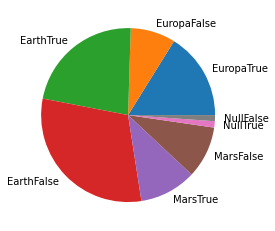

In [221]:
fig1, ax1 = plt.subplots()
ax1.pie([1404,727,1951,2651,920,839,103,98], labels=['EuropaTrue','EuropaFalse','EarthTrue','EarthFalse','MarsTrue','MarsFalse','NullTrue','NullFalse'])
plt.show()

In [222]:
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [223]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['HomePlanet'])

LabelEncoder()

In [224]:
df['HomePlanet'] = label_encoder.transform(df['HomePlanet'])

In [225]:
df.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,0,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,0,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,0,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,0,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,1,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [226]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['CryoSleep'])
df['CryoSleep'] = label_encoder.transform(df['CryoSleep'])

In [227]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['VIP'])
df['VIP'] = label_encoder.transform(df['VIP'])

In [228]:
df.drop(['PassengerId', 'Cabin','Destination', 'Name'], axis=1, inplace=True)


In [354]:
train,test = train_test_split(df,train_size = 0.8)

In [230]:
df[df['Age']>-1]['Age'].mean()

28.82793046746535

In [231]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Transported'],
      dtype='object')

In [338]:
df['Sum']  = df['RoomService']+df['FoodCourt']+df['ShoppingMall']+df['Spa']+df['VRDeck']

In [359]:
X = ['HomePlanet', 'CryoSleep', 'Age', 'VIP', 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
y = ['Transported']

In [233]:
df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] =df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

In [234]:
 df['Age'] = df['Age'].fillna(int(df[df['Age']>-1]['Age'].mean()))

In [365]:
df.head(35)

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Sum
0,1,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0.0
1,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,736.0
2,1,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,10383.0
3,1,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,5176.0
4,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1091.0
5,0,0,44.0,0,0.0,483.0,0.0,291.0,0.0,True,774.0
6,0,0,26.0,0,42.0,1539.0,3.0,0.0,0.0,True,1584.0
7,0,1,28.0,0,0.0,0.0,0.0,0.0,0.0,True,0.0
8,0,0,35.0,0,0.0,785.0,17.0,216.0,0.0,True,1018.0
9,1,1,14.0,0,0.0,0.0,0.0,0.0,0.0,True,0.0


In [242]:
df.isna().sum()

HomePlanet      0
CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [467]:
model  = RandomForestClassifier(criterion='entropy', 
                             n_estimators=920,
                             min_samples_split=13,
                             min_samples_leaf=13,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

In [468]:
model.fit(train[X],np.ravel(train[y]))

RandomForestClassifier(criterion='entropy', min_samples_leaf=13,
                       min_samples_split=13, n_estimators=920, n_jobs=-1,
                       oob_score=True, random_state=1)

In [469]:
test['predict'] = model.predict(test[X])

In [470]:
1 -  len(test[test['predict'] == test['Transported']])/len(test)

0.2116158711903393

In [247]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(main_test['HomePlanet'])
main_test['HomePlanet'] = label_encoder.transform(main_test['HomePlanet'])

In [248]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(main_test['CryoSleep'])
main_test['CryoSleep'] = label_encoder.transform(main_test['CryoSleep'])

In [249]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(main_test['VIP'])
main_test['VIP'] = label_encoder.transform(main_test['VIP'])

In [250]:
main_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] =main_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

In [251]:
 main_test['Age'] = main_test['Age'].fillna(int(main_test[main_test['Age']>-1]['Age'].mean()))

In [252]:
main_test.drop(['Cabin','Destination', 'Name'], axis=1, inplace=True)

In [253]:
main_test.head()

,PassengerId,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,0,1,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,0,0,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,1,1,31.0,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,1,0,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,0,0,20.0,0,10.0,0.0,635.0,0.0,0.0


In [456]:
main_test['Transported'] = model.predict(main_test[X])

In [457]:
main_test.head()

,PassengerId,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0013_01,0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,True
1,0018_01,0,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,False
2,0019_01,1,1,31.0,0,0.0,0.0,0.0,0.0,0.0,True
3,0021_01,1,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,True
4,0023_01,0,0,20.0,0,10.0,0.0,635.0,0.0,0.0,False


In [458]:
main_test[['PassengerId','Transported']].to_csv('/content/KaggleContest10.csv')